In [ ]:
! gdown https://drive.google.com/uc?id=1Ec_RIqhDc2brmVNUx8WZXycbIBoXC0J8

Downloading...
From: https://drive.google.com/uc?id=1Ec_RIqhDc2brmVNUx8WZXycbIBoXC0J8
To: /content/covid_vaccination_vs_death_ratio.csv
100% 1.74M/1.74M [00:00<00:00, 54.6MB/s]


In [ ]:
import pandas as pd

data=pd.read_csv("covid_vaccination_vs_death_ratio.csv")  

In [ ]:
import pandas as pd

data.pop("Unnamed: 0")
data.rename(columns={"ratio":"percent_vaccinated"},inplace=True)

#Coverting data type of ['date'] to datetime 
data["date"]=pd.to_datetime(data["date"],dayfirst=True)

#Adding data series['percent_fully_vaccinated']
data["percent_fully_vaccinated"]=(data["people_fully_vaccinated"]/data["population"])*100
data

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,percent_vaccinated,percent_fully_vaccinated
0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40064421.0,1.120391,0.138836
1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40064421.0,1.173962,0.193588
2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40064421.0,1.189003,0.241885
3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40064421.0,1.196503,0.277258
4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40064421.0,1.197007,0.283890
...,...,...,...,...,...,...,...,...,...,...
19252,Zimbabwe,ZWE,2021-09-21,5084031.0,2976212.0,2107819.0,2,15150655.0,19.644114,13.912395
19253,Zimbabwe,ZWE,2021-09-22,5123522.0,2992048.0,2131474.0,0,15150655.0,19.748638,14.068527
19254,Zimbabwe,ZWE,2021-09-23,5166508.0,3007945.0,2158563.0,23,15150655.0,19.853564,14.247325
19255,Zimbabwe,ZWE,2021-09-24,5197363.0,3021593.0,2175770.0,8,15150655.0,19.943646,14.360897


# **Question 1: Which country has highest fully vaccination percentage as of the latest date?**

We decide to remove China because according to The Diplomat and other sources "Given that China’s GDP data tend to be inflated, casting the illusion of impressive growth to Chinese citizens and observers around the world, the same manipulation could also apply to COVID-19 statistics."

Sources:
https://thediplomat.com/2020/03/can-chinas-covid-19-statistics-be-trusted/
https://time.com/5813628/china-coronavirus-statistics-wuhan/
https://globalnews.ca/news/7358278/china-covid-19-data-reliability/

In [ ]:
#Filtering to get only data from the latest date of each country
filtered_data=data.groupby("country")
latest_data=filtered_data.last()     
latest_data.reset_index(inplace=True)

#Removing countries that exceed 100% fully vaccinated (We chose to do the top 20 most populated countires, since countries with low population will have a biased towards it's ratios)
latest_data=latest_data[latest_data.percent_fully_vaccinated <= 100]
latest_data=latest_data[latest_data.country != "China"]
latest_data=latest_data.sort_values(by='population',ascending=False)[:20]
latest_data

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,percent_vaccinated,percent_fully_vaccinated
79,India,IND,2021-09-25,852156699.0,629574531.0,222582168.0,290,1.396764e+09,45.073778,15.935555
187,United States of America,USA,2021-09-25,389372689.0,213177462.0,183353326.0,1798,3.334006e+08,63.940334,54.994899
80,Indonesia,IDN,2021-09-25,133429623.0,85433518.0,47996105.0,123,2.770733e+08,30.834267,17.322530
133,Pakistan,PAK,2021-09-22,76141484.0,56229457.0,25493964.0,81,2.262721e+08,24.850367,11.266948
26,Brazil,BRA,2021-09-25,230477848.0,148959378.0,86085238.0,648,2.143499e+08,69.493553,40.161077
128,Nigeria,NGA,2021-09-22,6255025.0,4474172.0,1780853.0,0,2.127201e+08,2.103314,0.837181
15,Bangladesh,BGD,2021-09-25,39638948.0,23783472.0,15855476.0,25,1.667044e+08,14.266855,9.511134
145,Russian Federation,RUS,2021-09-25,89204756.0,47547409.0,41657347.0,822,1.459069e+08,32.587499,28.550635
112,Mexico,MEX,2021-09-24,98895325.0,63317849.0,44278675.0,811,1.305951e+08,48.484097,33.905314
88,Japan,JPN,2021-09-23,156559895.0,85829323.0,70730572.0,43,1.259454e+08,68.148058,56.159725


[Text(0, 0, 'France'),
 Text(0, 0, 'The United Kingdom'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'United States of America'),
 Text(0, 0, 'Turkey'),
 Text(0, 0, 'Brazil'),
 Text(0, 0, 'Mexico'),
 Text(0, 0, 'Russian Federation'),
 Text(0, 0, 'Thailand'),
 Text(0, 0, 'Indonesia'),
 Text(0, 0, 'Iran (Islamic Republic of)'),
 Text(0, 0, 'India'),
 Text(0, 0, 'Philippines'),
 Text(0, 0, 'Pakistan'),
 Text(0, 0, 'Bangladesh'),
 Text(0, 0, 'Viet Nam'),
 Text(0, 0, 'Egypt'),
 Text(0, 0, 'Nigeria'),
 Text(0, 0, 'Ethiopia')]

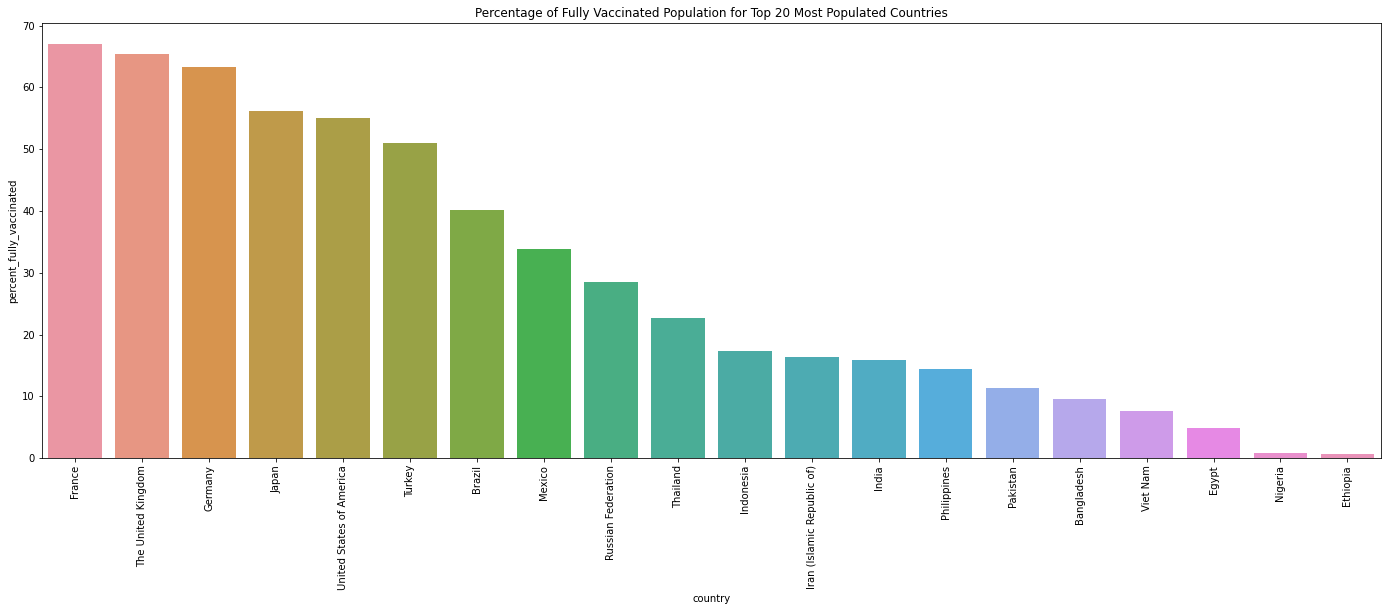

In [ ]:
import seaborn as sbs
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(24,8))

chart=sbs.barplot(x="country",y="percent_fully_vaccinated",data=latest_data.sort_values("percent_fully_vaccinated",ascending=False))   #Sort data in df only top 20 countries
chart.set_title('Percentage of Fully Vaccinated Population for Top 20 Most Populated Countries')
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [ ]:
latest_data=latest_data.drop(["iso_code","date","total_vaccinations","New_deaths","population","people_vaccinated","people_fully_vaccinated"], axis=1)

Text(0.5, 1.0, 'Percentage of Vaccinated & Fully Vaccinated Population for Top 20 Most Populated Countries')

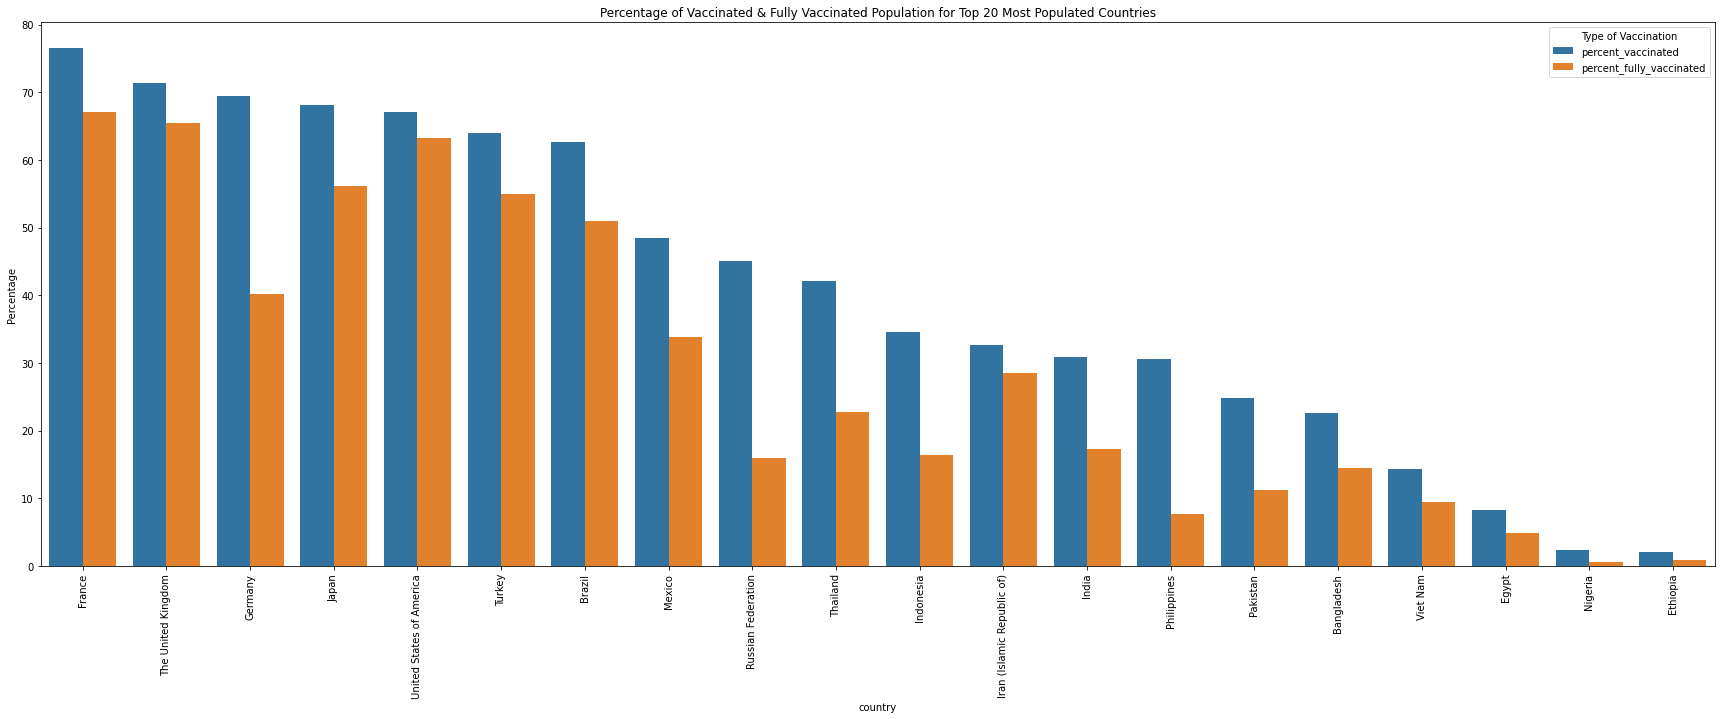

In [ ]:
melt=latest_data.melt("country",var_name="Type of Vaccination",value_name="Percentage")
fig,ax=plt.subplots(figsize=(30,10))
doublebar = sbs.barplot(x="country",y="Percentage",hue="Type of Vaccination",data=melt.sort_values("Percentage",ascending=False))
doublebar.set_xticklabels(chart.get_xticklabels(),rotation=90)
doublebar.set_title('Percentage of Vaccinated & Fully Vaccinated Population for Top 20 Most Populated Countries')

##ANSWER: 
According to our data, France has the highest percentage of the population fully vaccinated

# **Question 2: What is the trend between the rate of increase of percentage of population getting fully vaccinated per day affect the rate of people getting infected and the rate of new death per day?**


In [ ]:
#WHO data set for infected rate

! gdown https://drive.google.com/uc?id=1w-doOhD1idvlTPpj4DCAPtRd21CpVBnu

Downloading...
From: https://drive.google.com/uc?id=1w-doOhD1idvlTPpj4DCAPtRd21CpVBnu
To: /content/WHO-COVID-19-global-data.csv
100% 6.76M/6.76M [00:00<00:00, 103MB/s]


In [ ]:
data=data[data.country == 'France']
data.reset_index(inplace=True)
data.pop('index')
data

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,percent_vaccinated,percent_fully_vaccinated
0,France,FRA,2021-01-16,440353.0,440267.0,86.0,633,65466083.0,0.672512,0.000131
1,France,FRA,2021-01-17,451162.0,451034.0,128.0,192,65466083.0,0.688958,0.000196
2,France,FRA,2021-01-18,536689.0,536401.0,288.0,141,65466083.0,0.819357,0.000440
3,France,FRA,2021-01-19,666837.0,666424.0,413.0,401,65466083.0,1.017968,0.000631
4,France,FRA,2021-01-20,803917.0,803350.0,567.0,656,65466083.0,1.227124,0.000866
...,...,...,...,...,...,...,...,...,...,...
246,France,FRA,2021-09-19,93020725.0,49902736.0,43467447.0,42,65466083.0,76.226855,66.396896
247,France,FRA,2021-09-20,93200206.0,49941952.0,43561445.0,28,65466083.0,76.286758,66.540479
248,France,FRA,2021-09-21,93398796.0,49984907.0,43660315.0,9,65466083.0,76.352372,66.691503
249,France,FRA,2021-09-22,93634429.0,50029869.0,43801656.0,144,65466083.0,76.421051,66.907403


In [ ]:
infect=pd.read_csv("WHO-COVID-19-global-data.csv")  
infect=infect[infect.Country == 'France']
infect["Date_reported"]=pd.to_datetime(infect["Date_reported"],dayfirst=True)

In [ ]:
#[0] is the first index of the previous data for date, [250] is the last index of the previous data for date
infect=infect[infect.Date_reported >= data['date'].iloc[0]]
infect=infect[infect.Date_reported <= data['date'].iloc[-1]]

In [ ]:
infect['Population'] = list(data['population'])
infect['Percent_fully_vaccinated'] = list(data['percent_fully_vaccinated'])

infect.reset_index(inplace=True)
infect=infect.drop(['index','Country','WHO_region','Country_code'],axis=1)

In [ ]:
infect["Percent_infected"]=(infect["Cumulative_cases"]/infect["Population"])*100
infect["Percent_deaths"]=(infect["Cumulative_deaths"]/infect["Population"])*100
infect

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Population,Percent_fully_vaccinated,Percent_infected,Percent_deaths
0,2021-01-16,2682,2820601,633,69561,65466083.0,0.000131,4.308492,0.106255
1,2021-01-17,28922,2849523,192,69753,65466083.0,0.000196,4.352671,0.106548
2,2021-01-18,22710,2872233,141,69894,65466083.0,0.000440,4.387360,0.106764
3,2021-01-19,20813,2893046,401,70295,65466083.0,0.000631,4.419152,0.107376
4,2021-01-20,21609,2914655,656,70951,65466083.0,0.000866,4.452160,0.108378
...,...,...,...,...,...,...,...,...,...
246,2021-09-19,7414,6740406,42,113897,65466083.0,66.396896,10.296028,0.173979
247,2021-09-20,5814,6746220,28,113925,65466083.0,66.540479,10.304909,0.174021
248,2021-09-21,180,6746400,9,113934,65466083.0,66.691503,10.305184,0.174035
249,2021-09-22,7465,6753865,144,114078,65466083.0,66.907403,10.316586,0.174255


In [ ]:
filtered_infect=infect
filtered_infect=filtered_infect.drop(['New_cases','Cumulative_cases','New_deaths','Cumulative_deaths','Population'],axis=1)
filtered_infect

,Date_reported,Percent_fully_vaccinated,Percent_infected,Percent_deaths
0,2021-01-16,0.000131,4.308492,0.106255
1,2021-01-17,0.000196,4.352671,0.106548
2,2021-01-18,0.000440,4.387360,0.106764
3,2021-01-19,0.000631,4.419152,0.107376
4,2021-01-20,0.000866,4.452160,0.108378
...,...,...,...,...
246,2021-09-19,66.396896,10.296028,0.173979
247,2021-09-20,66.540479,10.304909,0.174021
248,2021-09-21,66.691503,10.305184,0.174035
249,2021-09-22,66.907403,10.316586,0.174255


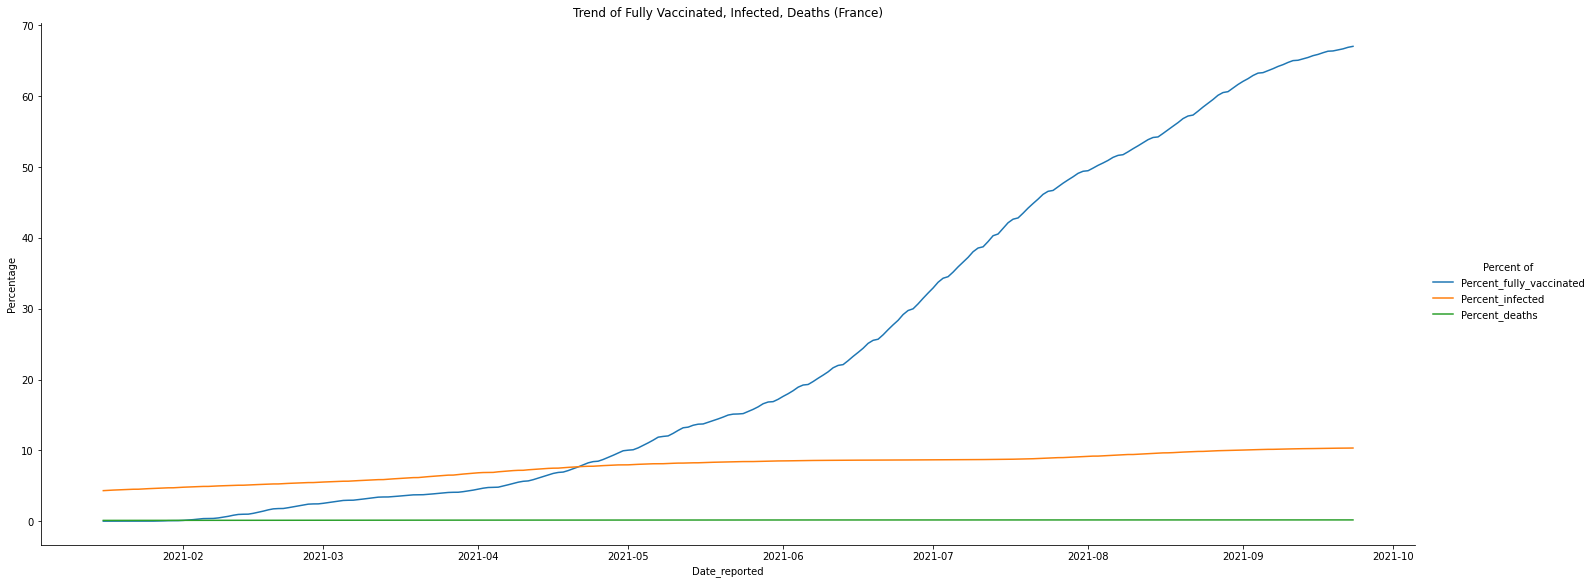

In [ ]:
df_melted=filtered_infect.melt('Date_reported',var_name='Percent of',value_name='Percentage')
sbs.relplot(data=df_melted,x='Date_reported',y='Percentage',hue='Percent of',kind='line',height=8,aspect=2.5).set(title='Trend of Fully Vaccinated, Infected, Deaths (France)')

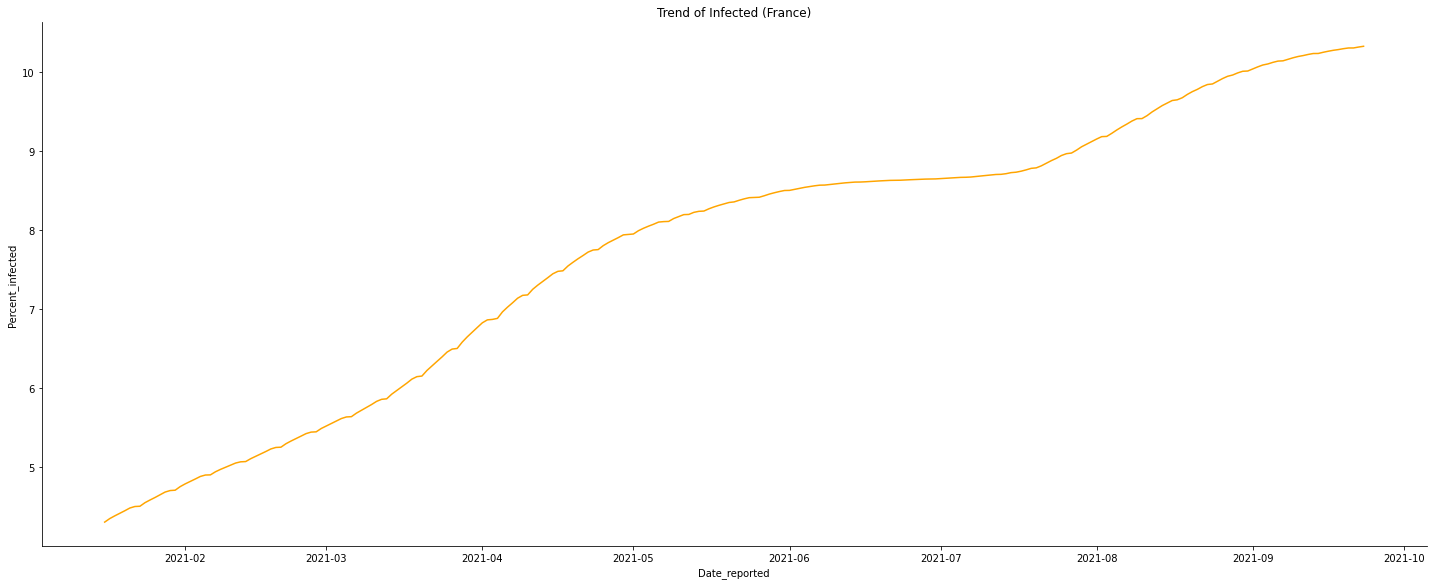

In [ ]:
#trend_infect
sbs.relplot(data=filtered_infect,x='Date_reported',y='Percent_infected',color='orange',kind='line',height=8,aspect=2.5).set(title='Trend of Infected (France)')

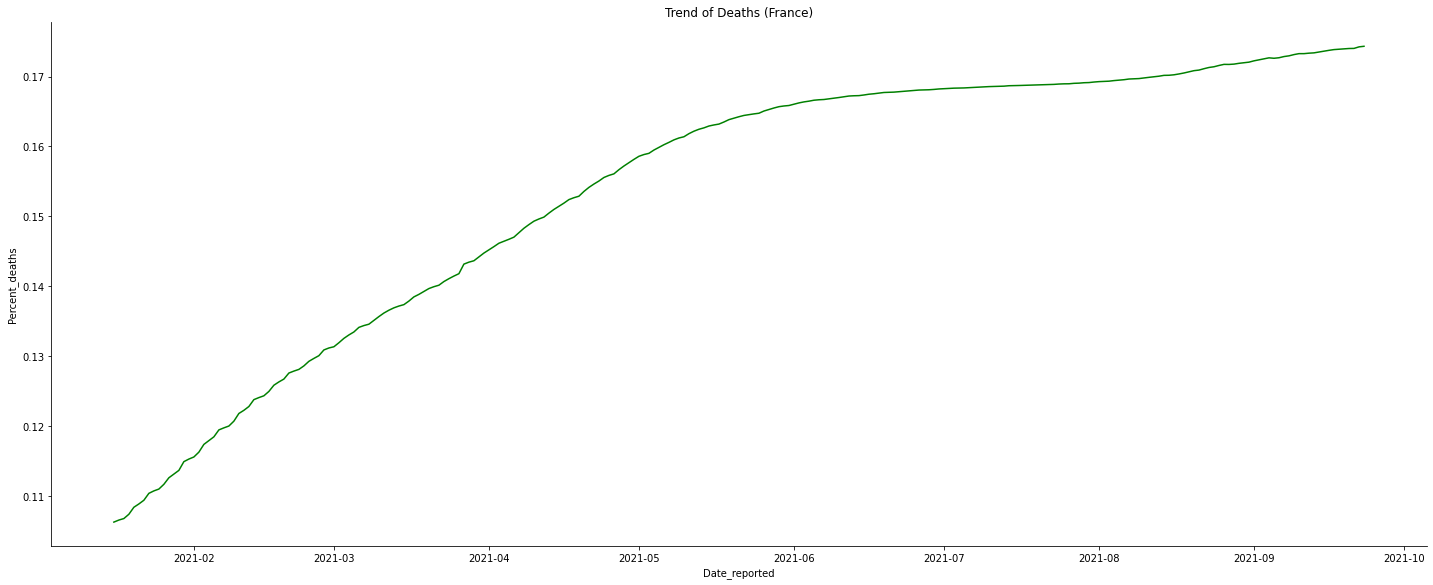

In [ ]:
#trend_death
sbs.relplot(data=filtered_infect,x='Date_reported',y='Percent_deaths',color='g',kind='line',height=8,aspect=2.5).set(title='Trend of Deaths (France)')

##ANSWER: 
According to our data, the trend of the percent of fully vaccinated have an albeit minor effect on percent of people infected, and percent of deaths. We speculation that this might be due to France being a first world country, which means their healthcares are more accessible and their regulations are more strict relative to other countires.

# **Question 3: Since we speculated that being fully vaccinated doesn't have that high of an effect due to quarantine regulations, we want to know the correlational coefficient between death and the percentages.

France is best country, therefore lowest slope for percent infect/percent vacc

In [ ]:
q3df=data
q3df=q3df[data.country == 'France'] 
q3df['cumulative_infected']=list(infect['Cumulative_cases'])
q3df['cumulative_deaths']=list(infect['Cumulative_deaths'])
q3df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,percent_vaccinated,percent_fully_vaccinated,cumulative_infected,cumulative_deaths
0,France,FRA,2021-01-16,440353.0,440267.0,86.0,633,65466083.0,0.672512,0.000131,2820601,69561
1,France,FRA,2021-01-17,451162.0,451034.0,128.0,192,65466083.0,0.688958,0.000196,2849523,69753
2,France,FRA,2021-01-18,536689.0,536401.0,288.0,141,65466083.0,0.819357,0.000440,2872233,69894
3,France,FRA,2021-01-19,666837.0,666424.0,413.0,401,65466083.0,1.017968,0.000631,2893046,70295
4,France,FRA,2021-01-20,803917.0,803350.0,567.0,656,65466083.0,1.227124,0.000866,2914655,70951
...,...,...,...,...,...,...,...,...,...,...,...,...
246,France,FRA,2021-09-19,93020725.0,49902736.0,43467447.0,42,65466083.0,76.226855,66.396896,6740406,113897
247,France,FRA,2021-09-20,93200206.0,49941952.0,43561445.0,28,65466083.0,76.286758,66.540479,6746220,113925
248,France,FRA,2021-09-21,93398796.0,49984907.0,43660315.0,9,65466083.0,76.352372,66.691503,6746400,113934
249,France,FRA,2021-09-22,93634429.0,50029869.0,43801656.0,144,65466083.0,76.421051,66.907403,6753865,114078


In [ ]:
filtered_3df=q3df.drop(['country','iso_code','date','total_vaccinations','New_deaths','population','percent_vaccinated','percent_fully_vaccinated'],axis=1)
filtered_3df

,people_vaccinated,people_fully_vaccinated,cumulative_infected,cumulative_deaths
0,440267.0,86.0,2820601,69561
1,451034.0,128.0,2849523,69753
2,536401.0,288.0,2872233,69894
3,666424.0,413.0,2893046,70295
4,803350.0,567.0,2914655,70951
...,...,...,...,...
246,49902736.0,43467447.0,6740406,113897
247,49941952.0,43561445.0,6746220,113925
248,49984907.0,43660315.0,6746400,113934
249,50029869.0,43801656.0,6753865,114078


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1

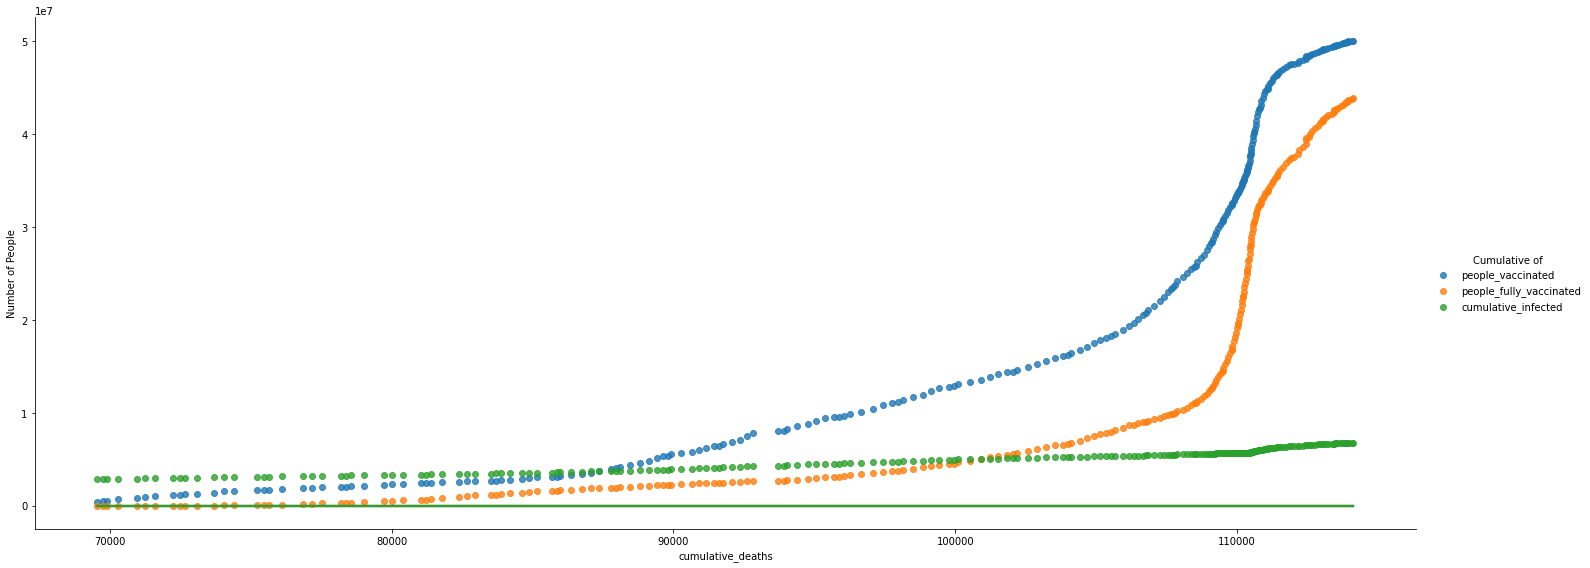

In [ ]:
q3df_melted=filtered_3df.melt('cumulative_deaths',var_name='Cumulative of',value_name='Number of People')

sbs.lmplot(x="cumulative_deaths", y='Number of People',hue='Cumulative of', data=q3df_melted,logistic=True,height=8,aspect=2.5)


In [ ]:
from scipy import stats
stats.pearsonr(q3df['cumulative_deaths'],q3df['people_vaccinated'])

(0.8900437542339327, 6.399772616797191e-87)